Hey

In [1]:
import pandas as pd
import lightgbm as ltb
import numpy as np
import re


from scipy.stats import linregress

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import preprocessing

import joblib

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')


%matplotlib inline
%config InlineBackend.figure_format = 'svg'


# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5



In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_seq_items', 1000)

In [ ]:
# MY COMPUTER

# READING INITIAL TRAIN DATA
# data_traff = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/train/hash_school_dpi_model_traff.sas7bdat')
# data = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/train/hash_school_dpi_model_fe.sas7bdat')

#WRITING INITIAL TRAIN DATA TO PARQUET
# data_traff.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/hash_school_dpi_model_traff.parquet.gzip',compression='gzip')
# data.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/hash_school_dpi_model_fe.parquet.gzip',compression='gzip')

# READING INITIAL TEST DATA
# data_traff_test = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_traff_test.sas7bdat')
# data_test = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_fe_test.sas7bdat')
# data_test2 = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_test.sas7bdat')

# READING INITIAL TRAIN DATA FROM PARQUET
# data_traff = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/hash_school_dpi_model_traff.parquet.gzip')
# data = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/hash_school_dpi_model_fe.parquet.gzip')


In [ ]:
# ED'S COMPUTER

# READING INITIAL TRAIN DATA
data_traff = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/train/hash_school_dpi_model_traff.sas7bdat')
data = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/train/hash_school_dpi_model_fe.sas7bdat')

#WRITING INITIAL TRAIN DATA TO PARQUET
# data_traff.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_traff.parquet.gzip',compression='gzip')
# data.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_fe.parquet.gzip',compression='gzip')

# READING INITIAL TEST DATA
# data_traff_test = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_traff_test.sas7bdat')
# data_test = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_fe_test.sas7bdat')
# data_test2 = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_test.sas7bdat')

# READING INITIAL TRAIN DATA FROM PARQUET
data_traff = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_traff.parquet.gzip')
data = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_fe.parquet.gzip')



In [4]:
# ED'S COMPUTER

# READING INITIAL TRAIN DATA
# data_traff_train = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/train/hash_school_dpi_model_traff.sas7bdat')
# data_train = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/train/hash_school_dpi_model_fe.sas7bdat')

#WRITING INITIAL TRAIN DATA TO PARQUET
# data_traff.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_traff.parquet.gzip',compression='gzip')
# 

# READING INITIAL TEST DATA
# data_traff_test = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_traff_test.sas7bdat')
# data_test = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_fe_test.sas7bdat')
# data_test2 = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_test.sas7bdat')

#WRITING MERGED TRAIN AND TEST DATA TO PARQUET
# data_train.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_train.parquet.gzip',compression='gzip')
# data_test.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/test/data_test.parquet.gzip',compression='gzip')

# READING INITIAL TRAIN AND TEST DATA FROM PARQUET
data_train= pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_train.parquet.gzip')
data_test = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/test/data_test.parquet.gzip')


In [7]:

#ED's COMPUTER
data_train_num= pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_train_num.parquet.gzip')
data_test_num= pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_test_num.parquet.gzip')

In [9]:
data_train.head()

abon_id   Balance_uah      TM_ID        lt  CALCULATION_METHOD_ID  \
index                                                                        
0      1000004.0  1.420369e+00  72.014152  4.536151                    1.0   
1      1000008.0  7.953525e+00  72.003644  4.537497                    1.0   
2      1000011.0  2.848294e-01  72.205782  4.552167                    1.0   
3      1000013.0  6.433818e-09  71.714189  4.537721                    1.0   
4      1000014.0  3.447618e+00  72.014152  4.564179                    1.0   

       device_days_usage  device_brand_samsung  device_brand_nokia  \
index                                                                
0               7.687248                   0.0                 0.0   
1              38.843408                   0.0                 0.0   
2              36.455885                   0.0                 0.0   
3              34.481767                   0.0                 0.0   
4               5.749902                   0.0                 0.0   

       device_brand_lenovo  device_brand_apple  device_brand_huawei  \
index                                                                 
0                      0.0                 0.0                  1.0   
1                      0.0                 0.0                  1.0   
2                      1.0                 0.0                  0.0   
3                      0.0                 0.0                  0.0   
4                      0.0                 0.0                  0.0   

       device_brand_lg  device_brand_xiaomi  device_brand_meizu  \
index                                                             
0                  0.0                  0.0                 0.0   
1                  0.0                  0.0                 0.0   
2                  0.0                  0.0                 0.0   
3                  0.0                  0.0                 0.0   
4                  0.0                  1.0                 0.0   

       device_brand_prestigio  device_brand_sony  device_brand_nan  \
index                                                                
0                         0.0                0.0               0.0   
1                         0.0                0.0               0.0   
2                         0.0                0.0               0.0   
3                         0.0                0.0               0.0   
4                         0.0                0.0               0.0   

       device_brand_other  device_android_version  device_ios_version  \
index                                                                   
0                     1.0                     9.0                 NaN   
1                     1.0                     7.0                 NaN   
2                     1.0                     NaN                 NaN   
3                     1.0                     NaN                 NaN   
4                     1.0                     NaN                 NaN   

       device_has_gprs  device_has_wifi  device_has_lte  device_width_mm  \
index                                                                      
0                  1.0              1.0             1.0              NaN   
1                  1.0              1.0             1.0              NaN   
2                  1.0              1.0             0.0              NaN   
3                  0.0              0.0             0.0              NaN   
4                  0.0              0.0             0.0              NaN   

       device_height_mm  device_type_modem  device_type_module  \
index                                                            
0                   NaN                0.0                 0.0   
1                   NaN                0.0                 0.0   
2                  71.0                0.0                 0.0   
3                   NaN                0.0                 0.0   
4                   NaN                0.0                 0.0   

    

In [ ]:
print(data.shape)
print(data_traff.shape)
data_traff = data_traff.drop_duplicates()
data = data.drop_duplicates()
print(data.shape)
print(data_traff.shape)

data = data.merge(data_traff, on = 'abon_id')
del data_traff

print(data_test.shape)
print(data_test2.shape)
print(data_traff_test.shape)
data_test = data_test.drop_duplicates()
data_test2 = data_test2.drop_duplicates()
data_traff_test = data_traff_test.drop_duplicates()
print(data_test.shape)
print(data_test2.shape)
print(data_traff_test.shape)

data_test = data_test.merge(data_test2, on = 'abon_id').merge(data_traff_test, on = 'abon_id')
del data_test2
del data_traff_test


(250043, 906)
(249967, 6)
(250026, 906)
(249955, 6)
(243150, 905)
(243150, 2)
(243085, 6)


In [ ]:


data_nulls_less_60p_outliers_mask = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_nulls_less_60p_outliers_mask.parquet.gzip')
data_nulls_less_60p = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_nulls_less_60p.parquet.gzip')
data_few_nans_not_univalue_target_corr = pd.read_csv('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_few_nans_not_univalue_target_corr.csv', \
                                                    index_col='index')

In [19]:
# data_test.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/test/data_full_test.parquet.gzip',compression='gzip')

In [ ]:
data_nulls_less_60p_outliers_mask = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p_outliers_mask.parquet.gzip')
data_nulls_less_60p = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p.parquet.gzip')
data_few_nans_not_univalue_target_corr = pd.read_csv('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_few_nans_not_univalue_target_corr.csv', \
                                                    index_col='index')

data_test = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/test/data_full_test.parquet.gzip')


In [ ]:
# data_traff_unique = data_traff.abon_id.value_counts()
# duplicates_data_traff = data_traff_unique[data_traff_unique > 1].index.to_list()
# data_traff.loc[data_traff['abon_id'].isin(duplicates_data_traff)].sort_values(by = 'abon_id')

In [6]:
data_train.head()

abon_id   Balance_uah      TM_ID        lt  CALCULATION_METHOD_ID  \
index                                                                        
0      1000004.0  1.420369e+00  72.014152  4.536151                    1.0   
1      1000008.0  7.953525e+00  72.003644  4.537497                    1.0   
2      1000011.0  2.848294e-01  72.205782  4.552167                    1.0   
3      1000013.0  6.433818e-09  71.714189  4.537721                    1.0   
4      1000014.0  3.447618e+00  72.014152  4.564179                    1.0   

       device_days_usage  device_brand_samsung  device_brand_nokia  \
index                                                                
0               7.687248                   0.0                 0.0   
1              38.843408                   0.0                 0.0   
2              36.455885                   0.0                 0.0   
3              34.481767                   0.0                 0.0   
4               5.749902                   0.0                 0.0   

       device_brand_lenovo  device_brand_apple  device_brand_huawei  \
index                                                                 
0                      0.0                 0.0                  1.0   
1                      0.0                 0.0                  1.0   
2                      1.0                 0.0                  0.0   
3                      0.0                 0.0                  0.0   
4                      0.0                 0.0                  0.0   

       device_brand_lg  device_brand_xiaomi  device_brand_meizu  \
index                                                             
0                  0.0                  0.0                 0.0   
1                  0.0                  0.0                 0.0   
2                  0.0                  0.0                 0.0   
3                  0.0                  0.0                 0.0   
4                  0.0                  1.0                 0.0   

       device_brand_prestigio  device_brand_sony  device_brand_nan  \
index                                                                
0                         0.0                0.0               0.0   
1                         0.0                0.0               0.0   
2                         0.0                0.0               0.0   
3                         0.0                0.0               0.0   
4                         0.0                0.0               0.0   

       device_brand_other  device_android_version  device_ios_version  \
index                                                                   
0                     1.0                     9.0                 NaN   
1                     1.0                     7.0                 NaN   
2                     1.0                     NaN                 NaN   
3                     1.0                     NaN                 NaN   
4                     1.0                     NaN                 NaN   

       device_has_gprs  device_has_wifi  device_has_lte  device_width_mm  \
index                                                                      
0                  1.0              1.0             1.0              NaN   
1                  1.0              1.0             1.0              NaN   
2                  1.0              1.0             0.0              NaN   
3                  0.0              0.0             0.0              NaN   
4                  0.0              0.0             0.0              NaN   

       device_height_mm  device_type_modem  device_type_module  \
index                                                            
0                   NaN                0.0                 0.0   
1                   NaN                0.0                 0.0   
2                  71.0                0.0                 0.0   
3                   NaN                0.0                 0.0   
4                   NaN                0.0                 0.0   

    

In [11]:
columns_nulls_less_60p = data_train.columns[(data_train.isnull().sum()/data_train['abon_id'].size) < 0.6]
print(columns_nulls_less_60p.shape)
data_nulls_less_60p = data_train[columns_nulls_less_60p]
data_nulls_less_60p.shape
# del data

(780,)


(250017, 780)

In [12]:
def mark_outliers(df, cols, outlier_coeff = 1.5): 
    outliers_mask = df.copy()
    counter = 1
    for col in cols:
        
        p75, p25 = df[col].quantile(0.75), df[col].quantile(0.25)
        IQR_col = p75 - p25
        upper, lower = p75 + outlier_coeff*IQR_col, p25 - outlier_coeff*IQR_col
        outliers_mask[col] = df[col].apply(lambda x: True if(x > upper or x < lower) else False)
        if (counter%100 == 0):
            print(counter)
        counter += 1
    return outliers_mask        
        
# test = pd.DataFrame(data = np.array([1,2,5,100,2,5,1000]), columns = ['test'])
# mark_outliers(test, test)

In [13]:
data_nulls_less_60p_outliers_mask = mark_outliers(data_nulls_less_60p, data_nulls_less_60p.columns)

100
200
300
400
500
600
700


In [ ]:
# data_nulls_less_60p_outliers_mask.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_nulls_less_60p_outliers_mask.parquet.gzip',compression='gzip')
# data_nulls_less_60p.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_nulls_less_60p.parquet.gzip',compression='gzip')

In [ ]:
# data_nulls_less_60p_outliers_mask.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p_outliers_mask.parquet.gzip',compression='gzip')
# data_nulls_less_60p.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p.parquet.gzip',compression='gzip')

# START HERE

In [14]:
def univalue_feauture_info (df, cols, outliers_mask_df):
    
    univalue_feauture_info_df = pd.DataFrame(columns=['col', '%of_fr_univalue', '%of_unfr_univalue','freq_value', 'if_cat', '%outliers', '%nans'])
    
    df_length = df.shape[0]
    
    for col in cols:
        
        value_count_info = df[col].value_counts().sort_values(ascending = False)
        
        if (np.array_equal(value_count_info.index, [1,0]) or np.array_equal(value_count_info.index,[0,1])):
            if_cat = 1 
        else: 
            if_cat = 0
            
        freq_value = value_count_info.index[0]
        freq_value_count = value_count_info.iloc[0]/df_length
        #print(freq_value_count)
        try:
            unfreq_value_count = value_count_info.iloc[1]/df_length
        except:
            unfreq_value_count = np.nan
        #print(unfreq_value_count)
        perc_outl = outliers_mask_df[col].sum()/df_length
        perc_nans = df[col].isnull().sum()/df_length
        
        #print(freq_count)
        univalue_feauture_info_df = univalue_feauture_info_df.append({'col': col, \
                                                                      '%of_fr_univalue': freq_value_count,\
                                                                      '%of_unfr_univalue': unfreq_value_count,\
                                                                      'if_cat': if_cat,\
                                                                      '%outliers': perc_outl,\
                                                                      '%nans': perc_nans,\
                                                                      'freq_value': freq_value},\
                                                                      ignore_index=True)
        
    return univalue_feauture_info_df.sort_values(by = ['%of_fr_univalue', '%outliers','%nans'], ascending=False)   

# data_nulls_less_60p_temp_mask = mark_outliers(data_nulls_less_60p, ['Balance_uah', 'CALCULATION_METHOD_ID', 'device_brand_other'])
# temp = univalue_feauture_info(data_nulls_less_60p, ['Balance_uah', 'CALCULATION_METHOD_ID', 'device_brand_other'],data_nulls_less_60p_temp_mask)
# temp

In [15]:
univalue_cols = univalue_feauture_info(data_nulls_less_60p, data_nulls_less_60p.columns, data_nulls_less_60p_outliers_mask)

In [16]:
def highlight_p75(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s >= s.quantile(0.75)
    return ['background-color: green' if v else '' for v in is_max]

def highlight_p95(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s >= s.quantile(0.95)
    return ['background-color: yellow' if v else '' for v in is_max]


In [17]:
cat_cols = univalue_cols[univalue_cols['if_cat'] == 1]
num_cols = univalue_cols[univalue_cols['if_cat'] == 0]

In [18]:
univalue_cat_cols_style = cat_cols.style.apply(highlight_p75, subset=['%outliers', '%nans']).format({'%of_fr_univalue': "{:.2%}",'%of_unfr_univalue': "{:.2%}",'%outliers': "{:.2%}",'%nans': "{:.2%}"})
univalue_cat_cols_style

In [19]:
cat_cols_list = cat_cols['col'].tolist()

target_by_cat_cols = pd.DataFrame(index=cat_cols_list, columns=['0', '1', '0_to_1_rate'])


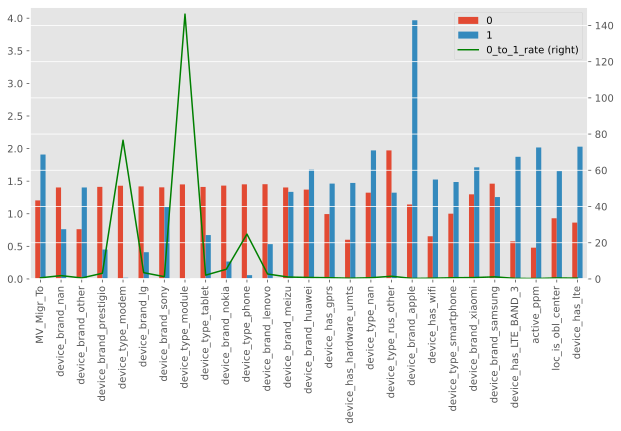

In [11]:
for col in cat_cols_list:
    temp = data_nulls_less_60p.pivot_table(columns=col,values='target', aggfunc='median').fillna(0).applymap(float)
#     print(temp.values[0][0])
    target_by_cat_cols.loc[col]['0'] = temp.values[0][0]
    target_by_cat_cols.loc[col]['1'] = temp.values[0][1]
    target_by_cat_cols.loc[col]['0_to_1_rate'] = temp.values[0][0]/temp.values[0][1]

width = .35
    
ax1 = target_by_cat_cols.loc[:, ['0', '1']].plot(kind = 'bar', figsize = (10,5), rot = 90);
ax2 = target_by_cat_cols['0_to_1_rate'].plot(secondary_y=True, colormap = 'ocean', rot = 90, legend = True);
ax2.set_ylim(0, 150);

In [12]:
target_by_cat_cols.sort_values(by = '0_to_1_rate',ascending = False)

0         1 0_to_1_rate
device_type_module        1.450159  0.009916  146.239787
device_type_modem         1.430222   0.01867   76.603667
device_type_phone         1.451873  0.058642   24.758107
device_brand_nokia        1.431742  0.267215    5.358015
device_brand_lg            1.41947  0.410003    3.462093
device_brand_prestigio    1.412137  0.451645    3.126652
device_brand_lenovo       1.453132  0.533938    2.721538
device_type_tablet        1.411989  0.673647    2.096036
device_brand_nan           1.40387  0.762984    1.839973
device_type_rus_other     1.972186  1.323181    1.490489
device_brand_sony         1.405317  1.102603    1.274546
device_brand_samsung      1.461141  1.255658    1.163646
device_brand_meizu        1.403531  1.336046    1.050511
device_brand_huawei       1.370969  1.676726    0.817647
device_brand_xiaomi       1.298529  1.712131    0.758428
device_has_gprs           0.995223  1.463142    0.680196
device_type_smartphone    1.001216  1.487142    0.673248
device_type_nan           1.323181  1.972186    0.670921
MV_Migr_To                1.204742  1.908772    0.631161
loc_is_obl_center         0.930542  1.654234    0.562521
device_brand_other        0.762984   1.40387    0.543486
device_has_wifi           0.654362  1.525605     0.42892
device_has_lte            0.864738  2.028824    0.426226
device_has_hardware_umts  0.601686  1.473131     0.40844
device_has_LTE_BAND_3      0.57689  1.874033    0.307834
device_brand_apple         1.14232  3.968569    0.287842
active_ppm                0.479359  2.017467    0.237604

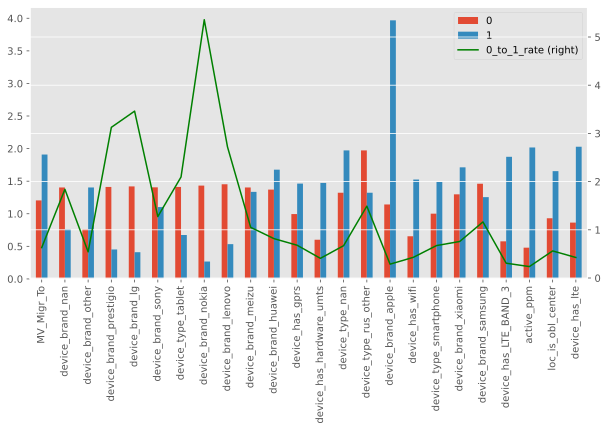

In [13]:
target_by_cat_cols_wo_modem_module = target_by_cat_cols[~target_by_cat_cols.index.isin(['device_type_module', 'device_type_modem', 'device_type_phone'])]

for col in target_by_cat_cols_wo_modem_module.index:
    temp = data_nulls_less_60p.pivot_table(columns=col,values='target', aggfunc='median').fillna(0).applymap(float)
#     print(temp.values[0][0])
    target_by_cat_cols_wo_modem_module.loc[col]['0'] = temp.values[0][0]
    target_by_cat_cols_wo_modem_module.loc[col]['1'] = temp.values[0][1]
    target_by_cat_cols_wo_modem_module.loc[col]['0_to_1_rate'] = temp.values[0][0]/temp.values[0][1]

width = .35
    
ax1 = target_by_cat_cols_wo_modem_module.loc[:, ['0', '1']].plot(kind = 'bar', figsize = (10,5), rot = 90);
ax2 = target_by_cat_cols_wo_modem_module['0_to_1_rate'].plot(secondary_y=True, colormap = 'ocean', rot = 90, legend = True);


In [20]:
num_cols = univalue_cols[univalue_cols['if_cat'] == 0]

num_cols['fr+nan'] = num_cols['%of_fr_univalue'] + num_cols['%nans']
print(num_cols.shape)

#starting a listy of columns, not useful for analysis
#adding columns with 100% of univalue + nan
cols_to_delete = num_cols[num_cols['fr+nan'] == 1]['col']

#filtering out columns with 100% of univalue + nan
num_cols = num_cols[num_cols['fr+nan'] != 1]

print(num_cols.shape)


num_cols = num_cols.sort_values(by = ['fr+nan'], ascending = False)
univalue_num_cols_style = num_cols.style.apply(highlight_p75, \
                                               subset=['%outliers', '%nans']).format({'%of_fr_univalue': "{:.2%}",\
                                                                                      '%of_unfr_univalue': "{:.2%}",\
                                                                                      '%outliers': "{:.2%}",\
                                                                                      '%nans': "{:.2%}", \
                                                                                      'fr+nan': "{:.4%}"})
univalue_num_cols_style

(753, 8)
(740, 8)


In [21]:
cols_with_univ_nan_more_099_and_nan_more_025 = num_cols[(num_cols['fr+nan'] > 0.99)|(num_cols['%nans'] > 0.25)]


# for col in cols_with_univ_nan_more_099_and_nan_more_025['col']:
#     print(col);
#     a = data_nulls_less_60p[col].loc[~data_nulls_less_60p[col].isna()]
#     a = a.loc[a != 0]
#     print(a.values);
#     print();

In [22]:
print(cols_to_delete.shape)
cols_to_delete = cols_to_delete.append(cols_with_univ_nan_more_099_and_nan_more_025.col)
print(cols_to_delete.shape)

num_cols = num_cols[num_cols['fr+nan'] < 0.99]
print(num_cols.shape)

(13,)
(106,)
(677, 8)


In [23]:
num_cols_plus_target = num_cols.col.tolist()
num_cols_plus_target.append('target')
data_few_nans_not_univalue = data_nulls_less_60p.loc[: , data_nulls_less_60p.columns.isin(num_cols_plus_target)]

In [40]:
data_few_nans_not_univalue_target_corr = pd.read_csv('C:/Users/Edward/Documents/Appleolga/Final_pro/data_few_nans_not_univalue_target_corr.csv')

In [41]:
data_fewnan_not_univ_targ_corr_high = data_few_nans_not_univalue_target_corr[(data_few_nans_not_univalue_target_corr.target<-0.2)|\
                                                                             (data_few_nans_not_univalue_target_corr.target > 0.2)]

In [41]:
# data_descr = pd.read_csv('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_descr.csv', \
#                          names=['feature', 'descr'])
# data_fewnan_not_univ_targ_corr_high_descr = pd.merge(data_fewnan_not_univ_targ_corr_high, data_descr, how='left', \
#                                                     left_index=True, right_on='feature')

In [42]:
data_descr = pd.read_csv('C:/Users/Edward/Documents/Appleolga/Final_pro/data_descr.csv', \
                         names=['feature', 'descr'])
data_fewnan_not_univ_targ_corr_high_descr = pd.merge(data_fewnan_not_univ_targ_corr_high, data_descr, how='left', \
                                                   left_on='index', right_on='feature')


In [52]:
data_fewnan_not_univ_targ_corr_high_descr.tail()

index    target     descr
49    target  1.000000    Таргет
50  traff_m5  0.522269  traff_m5
51  traff_m3  0.594176  traff_m3
52  traff_m2  0.634868  traff_m2
53  traff_m1  0.667660  traff_m1

In [49]:
data_fewnan_not_univ_targ_corr_high_descr.loc[data_fewnan_not_univ_targ_corr_high_descr['descr'].isna(),'descr'] = \
data_fewnan_not_univ_targ_corr_high_descr.loc[data_fewnan_not_univ_targ_corr_high_descr['descr'].isna(), 'index']

In [51]:
data_fewnan_not_univ_targ_corr_high_descr = data_fewnan_not_univ_targ_corr_high_descr.drop('feature', axis=1)

In [53]:
stats_list = ['_mea', '_std', '_max', '_min']
# data_fewnan_not_univ_targ_corr_high_descr = data_fewnan_not_univ_targ_corr_high_descr.\
#     assign(feature_clear = data_fewnan_not_univ_targ_corr_high_descr['feature'].apply(lambda x: re.sub('_mea.*', '', x)))


data_fewnan_not_univ_targ_corr_high_descr = data_fewnan_not_univ_targ_corr_high_descr.assign(\
                                                feature_clear = data_fewnan_not_univ_targ_corr_high_descr['index'])

data_fewnan_not_univ_targ_corr_high_descr['feature_clear'] = data_fewnan_not_univ_targ_corr_high_descr.feature_clear.\
    apply(lambda x: re.sub('_mea.*', '', str(x)))

 
data_fewnan_not_univ_targ_corr_high_descr['feature_clear'] = data_fewnan_not_univ_targ_corr_high_descr.feature_clear.\
    apply(lambda x: re.sub('_std.*', '', str(x)))

data_fewnan_not_univ_targ_corr_high_descr['feature_clear'] = data_fewnan_not_univ_targ_corr_high_descr.feature_clear.\
    apply(lambda x: re.sub('_max.*', '', str(x)))

data_fewnan_not_univ_targ_corr_high_descr['feature_clear'] = data_fewnan_not_univ_targ_corr_high_descr.feature_clear.\
    apply(lambda x: re.sub('_min.*', '', str(x)))

In [54]:
data_fewnan_not_univ_targ_corr_high_descr.tail()

index    target     descr feature_clear
49    target  1.000000    Таргет        target
50  traff_m5  0.522269  traff_m5      traff_m5
51  traff_m3  0.594176  traff_m3      traff_m3
52  traff_m2  0.634868  traff_m2      traff_m2
53  traff_m1  0.667660  traff_m1      traff_m1

In [57]:
best_target_corr = data_fewnan_not_univ_targ_corr_high_descr.groupby('feature_clear').max('target')
cols = list(data_fewnan_not_univ_targ_corr_high_descr.loc[data_fewnan_not_univ_targ_corr_high_descr['target'].\
                                              isin(best_target_corr.target)]['index'])
cols

['MV_Traf_2G_d_Mb',
 'MV_Traf_3G_d_Mb',
 'MV_Traf_4G_d_Mb',
 'MV_ARPU',
 'MV_ap_4G_d',
 'MV_ap_innet_out_v',
 'MV_AP_total',
 'non_accum_internet_vol_max_mnt3',
 'gprs_tar_vol_mea_mnt3',
 'data_3g_tar_vol_mea_mnt3',
 'data_3g_tv_cnt_max_mnt1',
 'content_cnt_mea_mnt3',
 'clc_no_vas_roam_std_mnt3',
 'all_cnt_mea_mnt3',
 'all_clc_mea_mnt3',
 'dpi_duration',
 'dpi_upload',
 'dpi_download',
 'dpi_events',
 'dpi_day_cnt',
 'target',
 'traff_m5',
 'traff_m3',
 'traff_m2',
 'traff_m1']

In [58]:

def highlight_corr_06_plus(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_high = s >= 0.6
    return ['background-color: red' if v else '' for v in is_high]

In [60]:
important_cols_corr = data_train[cols].corr()
# important_cols_corr = important_cols_corr.apply(lambda x: x.abs())
important_cols_style = important_cols_corr.style.apply(highlight_corr_06_plus).format("{:.2%}")

important_cols_style


In [61]:
totals_for_pca = ['MV_ARPU', 'MV_ap_4G_d', 'MV_AP_total','clc_no_vas_roam_std_mnt3','all_clc_mea_mnt3']
dpi_for_pca = ['dpi_duration', 'dpi_upload', 'dpi_download', 'dpi_events']

In [62]:
traffic_cols = ['traff_m5', 'traff_m3','traff_m2','traff_m1']
traffic_cols.sort()
traffic_cols_plus_target = ['traff_m5', 'traff_m3','traff_m2','traff_m1', 'target']
traffic_cols_plus_target.sort()

In [110]:
traffic_cols

['traff_m1', 'traff_m2', 'traff_m3', 'traff_m5']

### ANALYSING TRAFFIC TENDENCIES


In [63]:
data_traffic = data_train[traffic_cols_plus_target]
# data_traffic.describe()

data_traffic_test = data_test[traffic_cols_plus_target]

In [64]:
data_traffic = data_traffic.assign(var = data_traffic.apply(lambda x: x.var(), axis=1))
# data_traffic.describe()

data_traffic_test = data_traffic_test.assign(var = data_traffic_test.apply(lambda x: x.var(), axis=1))

In [65]:
var_quantiles = data_traffic['var'].quantile(np.linspace(.1, 1, 19, 0.5))
data_traffic = data_traffic.assign(var_quant = pd.qcut(data_traffic['var'], 10,labels = False))



var_quantiles_test = data_traffic_test['var'].quantile(np.linspace(.1, 1, 19, 0.5))
data_traffic_test = data_traffic_test.assign(var_quant = pd.qcut(data_traffic_test['var'], 10,labels = False))

In [ ]:
data_traffic.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_traffic_with_var_quant.parquet.gzip',compression='gzip')
# data_nulls_less_60p.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p.parquet.gzip',compression='gzip')

#### Trends

In [66]:
enum = np.arange(1, len(traffic_cols)+1, 1)
data_traffic = data_traffic.assign(slope_traff = data_traffic.apply(lambda x: linregress(enum, x[traffic_cols]).slope, axis=1))

data_traffic_test = data_traffic_test.assign(slope_traff = data_traffic_test.apply(lambda x: linregress(enum, x[traffic_cols]).slope, axis=1))

In [118]:
data_traffic.head()

target  traff_m1  traff_m2  traff_m3  traff_m5       var  var_quant  \
index                                                                          
0      0.000000  0.979661  0.005645  0.092987  0.932736  0.257391          3   
1      4.247739  3.556069  4.519390  4.080437  3.488962  0.198385          2   
2      0.173939  0.258421  0.216497  0.276031  0.431192  0.009559          1   
3      0.167172  0.000000  0.128936  0.060330  0.120501  0.004309          0   
4      1.519250  6.695070  1.696576  2.260957  1.861093  4.800334          6   

       slope_traff  
index               
0        -0.005343  
1        -0.064028  
2         0.057785  
3         0.029290  
4        -1.393755

In [ ]:
xmin = X.iloc[:, 0].min()
xmax = X.iloc[:, 0].max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, nrows = 3, sharey=True, figsize=(7, 4))
# fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

ax = axs[0, 0]
hb = ax.hexbin(X.iloc[:, 0], y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title(X.columns[0])
cb = fig.colorbar(hb, ax=ax)


xmin = X.iloc[:, 1].min()
xmax = X.iloc[:, 1].max()

ax = axs[0, 1]
hb = ax.hexbin(X.iloc[:, 1], y, gridsize=50,  bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title(X.columns[1])
cb = fig.colorbar(hb, ax=ax)


xmin = X.iloc[:, 2].min()
xmax = X.iloc[:, 2].max()

ax = axs[0, 2]
hb = ax.hexbin(X.iloc[:, 2], y, gridsize=50,  bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title(X.columns[2])
cb = fig.colorbar(hb, ax=ax)


xmin = X.iloc[:, 3].min()
xmax = X.iloc[:, 3].max()

ax = axs[1, 1]
hb = ax.hexbin(X.iloc[:, 3], y, gridsize=50,  bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title(X.columns[3])
cb = fig.colorbar(hb, ax=ax)
plt.show()


In [62]:
data.shape

(250058, 911)

### TRAIN-TEST

In [67]:
# data_traffic = data[traffic_cols]
# data_nulls_filled0 = data_traffic.fillna(0)

data_nulls_filled0 = data_train[cols].fillna(0)
data_for_pca_totals = data_nulls_filled0[totals_for_pca]
data_for_pca_dpi = data_nulls_filled0[dpi_for_pca]

In [68]:
data_nulls_filled0_test = data_test[cols].fillna(0)
data_for_pca_totals_test = data_nulls_filled0_test[totals_for_pca]
data_for_pca_dpi_test = data_nulls_filled0_test[dpi_for_pca]

In [69]:
sc_x_traf = StandardScaler()

X_std = sc_x_traf.fit_transform(data_for_pca_totals)

pca = PCA(random_state=3)
X_pca_totals = pca.fit_transform(X_std)
pd.DataFrame(pca.explained_variance_ratio_).style.format("{:.2%}")


In [70]:
sc_x_traf_test = StandardScaler()

X_std_test = sc_x_traf_test.fit_transform(data_for_pca_totals_test)

pca_test = PCA(random_state=3)
X_pca_totals_test = pca_test.fit_transform(X_std_test)
pd.DataFrame(pca_test.explained_variance_ratio_).style.format("{:.2%}")

In [71]:
sc_x_traf = StandardScaler()

X_std = sc_x_traf.fit_transform(data_for_pca_dpi)

pca = PCA(random_state=3)
X_pca_dpi = pca.fit_transform(X_std)
pd.DataFrame(pca.explained_variance_ratio_).style.format("{:.2%}")

In [72]:
sc_x_traf_test = StandardScaler()

X_std_test = sc_x_traf_test.fit_transform(data_for_pca_dpi_test)

pca_test = PCA(random_state=3)
X_pca_dpi_test = pca_test.fit_transform(X_std_test)
pd.DataFrame(pca_test.explained_variance_ratio_).style.format("{:.2%}")

In [73]:
sc_x_traf = StandardScaler()

X_std = sc_x_traf.fit_transform(data_for_pca_dpi)

pca = PCA(n_components = 2, random_state=3)
X_pca_dpi = pca.fit_transform(X_std)

sc_x_traf_test = StandardScaler()

X_std_test = sc_x_traf_test.fit_transform(data_for_pca_dpi_test)

pca_test = PCA(n_components = 2, random_state=3)
X_pca_dpi_test = pca_test.fit_transform(X_std_test)


In [42]:
# from sklearn import datasets


# X=X_traf_std
# y=data['target']

# pca = PCA()
# pca.fit(X,y)
# x_new = pca.transform(X)   

# def myplot(score,coeff,labels=None):
#     xs = score[:,0]
#     ys = score[:,1]
#     n = coeff.shape[0]

#     plt.scatter(xs ,ys, c = y) #without scaling
#     for i in range(n):
#         plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
#         if labels is None:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
#         else:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

# plt.xlabel("PC{}".format(1))
# plt.ylabel("PC{}".format(2))
# plt.grid()

# #Call the function. 
# myplot(x_new[:,0:2], pca. components_) 
# plt.show()

In [56]:
model = PCA(n_components=5).fit(X_traf_std)
X_pc = model.transform(X_traf_std)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [traffic_cols[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [53]:
df

0         1
0  PC0  traff_m2
1  PC1  traff_m5
2  PC2  traff_m3
3  PC3  traff_m2

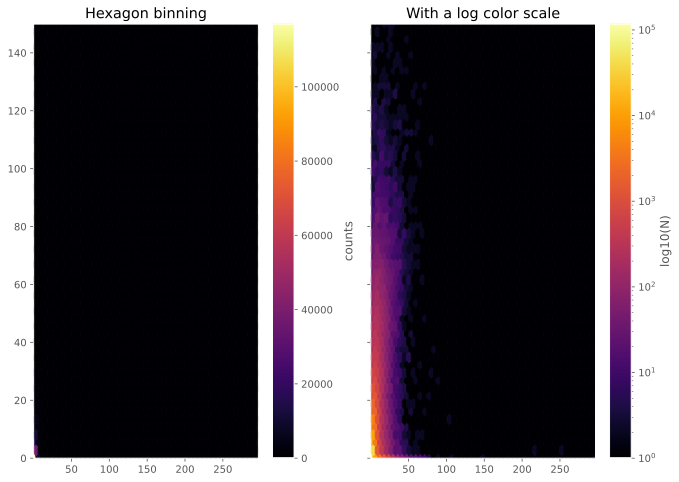

In [262]:
xmin = var.min()
xmax = var.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(var, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(var, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

In [265]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import mutual_info_regression
# from matplotlib import pyplot
 
# # feature selection
# def select_features(X_train, y_train, X_test):
#     # configure to select all features
#     fs = SelectKBest(score_func=mutual_info_regression, k='all')
#     # learn relationship from training data
#     fs.fit(X_train, y_train)
#     # transform train input data
#     X_train_fs = fs.transform(X_train)
#     # transform test input data
#     X_test_fs = fs.transform(X_test)
#     return X_train_fs, X_test_fs, fs
 
# X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# # what are scores for the features
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))
# # plot the scores
# pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
# pyplot.show()

Feature 0: 70856.056414
Feature 1: 94678.545834
Feature 2: 119794.982230
Feature 3: 144000.368815


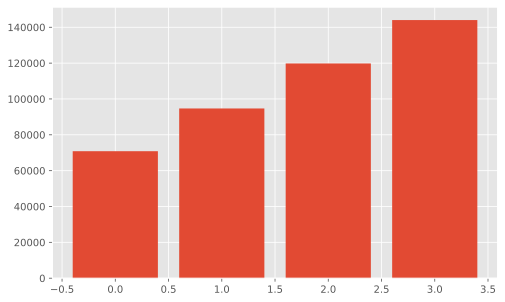

In [73]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#class sklearn.feature_selection.VarianceThreshold(threshold=0.0)
#SPEARMAN Correlation

In [75]:
data_nulls_filled0 = data_train[cols].drop(totals_for_pca, axis=1).fillna(0)
data_nulls_filled0 = data_nulls_filled0.drop(dpi_for_pca, axis=1)
data_nulls_filled0 = data_nulls_filled0.assign(pca1=X_pca_totals[:, 0], 
                                               pca2=X_pca_dpi[:, 0],
                                               pca3=X_pca_dpi[:, 1], 
                                               var_quant = data_traffic['var_quant'],
                                               slope_traff = data_traffic['slope_traff'])


# data_nulls_filled0 = data[cols].drop(totals_for_pca, axis=1).fillna(0)
# data_nulls_filled0 = data_nulls_filled0.drop(dpi_for_pca, axis=1)
# data_nulls_filled0 = data_nulls_filled0.assign(pca1=X_pca_totals[:, 0], 
#                                                pca2=X_pca_dpi[:, 0],
#                                                pca3=X_pca_dpi[:, 1], 
#                                                var_quant = data_traffic['var_quant'])


data_nulls_filled0 = data_nulls_filled0.drop('gprs_tar_vol_mea_mnt3', axis=1)


# data_nulls_filled0 = data[cols].fillna(0)

In [76]:
data_nulls_filled0_test = data_test[cols].drop(totals_for_pca, axis=1).fillna(0)
data_nulls_filled0_test = data_nulls_filled0_test.drop(dpi_for_pca, axis=1).fillna(0)
data_nulls_filled0_test = data_nulls_filled0_test.assign(pca1=X_pca_totals_test[:, 0], 
                                                         pca2=X_pca_dpi_test[:, 0],
                                                         pca3=X_pca_dpi_test[:, 1], 
                                                         var_quant = data_traffic_test['var_quant'], 
                                                         slope_traff = data_traffic_test['slope_traff'])


# data_nulls_filled0_test = data_test[cols].drop(totals_for_pca, axis=1).fillna(0)
# data_nulls_filled0_test = data_nulls_filled0_test.drop(dpi_for_pca, axis=1).fillna(0)
# data_nulls_filled0_test = data_nulls_filled0_test.assign(pca1=X_pca_totals_test[:, 0], 
#                                                          pca2=X_pca_dpi_test[:, 0],
#                                                          pca3=X_pca_dpi_test[:, 1], 
#                                                          var_quant = data_traffic_test['var_quant'])
# # data_nulls_filled0 = data[cols].fillna(0)


data_nulls_filled0_test = data_nulls_filled0_test.drop('gprs_tar_vol_mea_mnt3', axis=1)

In [94]:
data_nulls_filled0 = data_nulls_filled0[data_nulls_filled0['var_quant'] != 9]
data_nulls_filled0_test = data_nulls_filled0_test[data_nulls_filled0_test['var_quant'] != 9]

In [95]:
X, y = data_nulls_filled0.loc[:, data_nulls_filled0.columns != 'target'], data_nulls_filled0.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 17)

In [96]:
X_test_test, y_test_test = data_nulls_filled0_test.loc[:, data_nulls_filled0_test.columns != 'target'], data_nulls_filled0_test.target

In [91]:
data_nulls_filled0.columns

Index(['MV_Traf_2G_d_Mb', 'MV_Traf_3G_d_Mb', 'MV_Traf_4G_d_Mb',
       'MV_ap_innet_out_v', 'non_accum_internet_vol_max_mnt3',
       'data_3g_tar_vol_mea_mnt3', 'data_3g_tv_cnt_max_mnt1',
       'content_cnt_mea_mnt3', 'all_cnt_mea_mnt3', 'dpi_day_cnt', 'target',
       'traff_m5', 'traff_m3', 'traff_m2', 'traff_m1', 'pca1', 'pca2', 'pca3',
       'var_quant', 'slope_traff'],
      dtype='object')

In [ ]:

#3
['MV_Traf_2G_d_Mb', 'MV_Traf_3G_d_Mb', 'MV_Traf_4G_d_Mb',
       'MV_ap_innet_out_v', 'non_accum_internet_vol_max_mnt3',
       'data_3g_tar_vol_mea_mnt3', 'data_3g_tv_cnt_max_mnt1',
       'content_cnt_mea_mnt3', 'all_cnt_mea_mnt3', 'dpi_day_cnt', 'target',
       'traff_m5', 'traff_m3', 'traff_m2', 'traff_m1', 'var_quant',
       'slope_traff', 'pca1', 'pca2', 'pca3'],

In [ ]:
#2
[
       ''non_accum_internet_vol_max_mnt3',
       'data_3g_tar_vol_mea_mnt3', 'data_3g_tv_cnt_max_mnt1',
       
        

In [ ]:
'gprs_tar_vol_mea_mnt3', 
       'all_clc_mea_mnt3', 'var', 

In [250]:
# LINEAR REGRESSION RESULTS


# cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
# Slope: 0.15
# Intercept: 1.30
# RMSE train: 8.584659, test: 8.514558
# R^2 train: 0.474909, test: 0.492442


#hight corr target columns, stats chosen by highest correlation with target

#MV_Traf_2G_d_Mb','MV_Traf_3G_d_Mb','MV_Traf_4G_d_Mb','MV_ARPU','MV_ap_4G_d','MV_ap_innet_out_v','MV_AP_total',
#'non_accum_internet_vol_max_mnt3','gprs_tar_vol_mea_mnt3','data_3g_tar_vol_mea_mnt3','data_3g_tv_cnt_max_mnt1',
# 'content_cnt_mea_mnt3','clc_no_vas_roam_std_mnt3','all_cnt_mea_mnt3','all_clc_mea_mnt3','dpi_duration','dpi_upload',
# 'dpi_download','dpi_events','dpi_day_cnt','target','traff_m5','traff_m3','traff_m2', 'traff_m1']
# Slope: 0.04
# Intercept: -2.23
# RMSE train: 8.511254, test: 8.466906
# R^2 train: 0.483850, test: 0.498107


#withou traffic columns with their STD instead
# Slope: 0.02
# Intercept: -3.36
# RMSE train: 8.940543, test: 8.900981
# R^2 train: 0.430470, test: 0.445326


#pca1 and pca2 instead of traffic columns
# Slope: 0.04
# Intercept: 2.00
# RMSE train: 8.640514, test: 8.599313
# R^2 train: 0.468054, test: 0.482287



#all data standard scaled
# Slope: 0.01
# Intercept: 0.00
# RMSE train: 0.000000, test: 8.466906
# R^2 train: 1.000000, test: 0.498107

#totals_for_pca + dpi_for_pca  = one PCA taken from totals, 2 from dpi

# Slope: 0.04
# Intercept: 2656217253792.36
# RMSE train: 8.374349, test: 8.331864
# R^2 train: 0.500321, test: 0.513989

# with traffic variance quantiles, different regression model by quantile 
# Train set results

# RMSE train: 7.998114, test: 8.066895
# R^2 train: 0.543879, test: 0.545170

# Test set results

# RMSE test_test: 8.130670
# R^2 test_test: 0.511574

# with traffic variance quantiles, different regression model by quantile + slope coeff for traffic data

# Train set results

# RMSE train: 7.998114, test: 8.066895
# R^2 train: 0.543879, test: 0.545170

# Test set results

# RMSE test_test: 8.130670
# R^2 test_test: 0.511574

# with traffic variance quantiles, different regression model by quantile + slope coeff for traffic data
#gprs_tar_vol_mea_mnt3 column dropped based on low coefficients 

# Train set results

# RMSE train: 7.998185, test: 8.067140
# R^2 train: 0.543871, test: 0.545142

# Test set results

# RMSE test_test: 8.130594
# R^2 test_test: 0.511583
    
#Choosing features by regression coefficients did not work out!!!



In [105]:
index_FP2 = X_train.index
X_train.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/X_train_FP2.parquet.gzip',compression='gzip')

In [109]:
data_nulls_filled0.loc[108, :]

MV_Traf_2G_d_Mb                     8.734410
MV_Traf_3G_d_Mb                     4.503460
MV_Traf_4G_d_Mb                    10.492021
MV_ap_innet_out_v                   0.066976
non_accum_internet_vol_max_mnt3    16.376745
data_3g_tar_vol_mea_mnt3           12.924332
data_3g_tv_cnt_max_mnt1             3.663562
content_cnt_mea_mnt3                2.224624
all_cnt_mea_mnt3                    5.222606
dpi_day_cnt                        30.000000
target                             24.615115
traff_m5                           16.890106
traff_m3                           29.949622
traff_m2                           35.416218
traff_m1                           33.929386
pca1                                1.745438
pca2                                3.401365
pca3                                0.314296
var_quant                           8.000000
slope_traff                        -5.658444
Name: 108, dtype: float64

In [97]:
slr = LinearRegression()

slr.fit(X_train, y_train)


print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print()
print('Train set results')
print()
print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train, y_train_pred, squared = False),
        mean_squared_error(y_test, y_test_pred, squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))



y_test_test_pred = slr.predict(X_test_test)

print()
print('Test set results')
print()
print('RMSE test_test: {:.6f}'.format(
        mean_squared_error(y_test_test, y_test_test_pred, squared = False)))
print('R^2 test_test: {:.6f}'.format(
        r2_score(y_test_test, y_test_test_pred)))

Slope: -0.02
Intercept: 2.34

Train set results

RMSE train: 3.497443, test: 3.488386
R^2 train: 0.700062, test: 0.700425

Test set results

RMSE test_test: 3.638886
R^2 test_test: 0.700813


In [92]:
X_tr.head()

MV_Traf_2G_d_Mb  MV_Traf_3G_d_Mb  MV_Traf_4G_d_Mb  MV_ap_innet_out_v  \
index                                                                          
175859         7.645298         1.982727         8.305762           0.059034   
238345         3.110233         0.000000        11.144575           0.000000   
135300         7.243891        10.331923         1.838773           0.065497   
158199         3.507564         7.899252         0.000000           0.163164   
6326           2.742004         9.475789         0.000000           0.069181   

        non_accum_internet_vol_max_mnt3  data_3g_tar_vol_mea_mnt3  \
index                                                               
175859                        15.627745                 11.048729   
238345                        16.859409                  5.957112   
135300                        16.906859                 15.632615   
158199                        14.769021                 12.602116   
6326                          15.775201                 15.130047   

        data_3g_tv_cnt_max_mnt1  content_cnt_mea_mnt3  all_cnt_mea_mnt3  \
index                                                                     
175859                 1.945910              2.803360          4.909586   
238345                 0.000000              3.336659          4.334017   
135300                 6.979145              2.838103          6.431063   
158199                 3.178054              1.749200          3.444682   
6326                   4.787492              3.305054          5.227090   

        dpi_day_cnt   traff_m5   traff_m3   traff_m2   traff_m1      pca1  \
index                                                                       
175859         30.0   1.860958  26.519240   4.840656  11.569672  1.646661   
238345         30.0   0.000000   7.367850  65.026788  48.751678 -0.811979   
135300         30.0  23.907410  14.771352  29.977042  36.208307  1.877699   
158199          8.0   0.169986   0.365673   2.663925   5.813389  0.889544   
6326           30.0  32.594279  26.501317  12.373384   3.307647  1.776003   

            pca2      pca3  var_quant  slope_traff  
index                                               
175859 -0.018107  0.119437          9    -0.744756  
238345  4.993607  1.121419          9   -20.391397  
135300  3.259527 -0.105217          9    -5.210838  
158199 -0.685112  0.079314          9    -1.922846  
6326    2.091834 -0.140357          9    10.198783

In [93]:
X_list, y_list = [], []
df_list = []

coeff = []

for g, v in data_nulls_filled0[data_nulls_filled0['var_quant'] != 9].groupby('var_quant'):
    
    X_list.append(v.loc[:, v.columns != 'target'])
    y_list.append(v.target)
    
# df_list = []

for i, j in zip(X_list, y_list):
    df_list.append(train_test_split(i, j, test_size=0.30, train_size = 0.70, random_state = 13))
    

y_train_pred, y_test_pred, y_train, y_test = pd.Series(), pd.Series(), pd.Series(), pd.Series()

for X_tr, X_ts, y_tr, y_ts in df_list:
    slr = LinearRegression()

    slr.fit(X_tr, y_tr)
    train_pred = pd.Series(data = slr.predict(X_tr), index=y_tr.index)
    y_train_pred = y_train_pred.append(train_pred)
#     print(y_train_pred.shape)
    
    test_pred = pd.Series(data = slr.predict(X_ts), index=y_ts.index)
    y_test_pred = y_test_pred.append(test_pred)
    
    y_train = y_train.append(y_tr)
    y_test = y_test.append(y_ts) 
    
    print(str(X_tr['var_quant'].unique()[0])+' quantile set results')
    print()

    print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_tr, train_pred, squared = False),
        mean_squared_error(y_ts, test_pred, squared = False)))
    print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_tr, train_pred),
        r2_score(y_ts, test_pred)))
    
    coeff.append(slr.coef_)    
    
    joblib_file = "joblib_model"+"_q"+str(X_tr['var_quant'].unique()[0])+".pkl"
    joblib.dump(slr, joblib_file)
    
print()
print('RMSE train TOTAL: {:.6f}, test TOTAL: {:.6f}'.format(
mean_squared_error(y_train, y_train_pred, squared = False),
mean_squared_error(y_test, y_test_pred, squared = False)))  


0 quantile set results

RMSE train: 0.049281, test: 0.048308
R^2 train: 0.817319, test: 0.873058
1 quantile set results

RMSE train: 0.210020, test: 0.210498
R^2 train: 0.752092, test: 0.757223
2 quantile set results

RMSE train: 0.447215, test: 0.447585
R^2 train: 0.665347, test: 0.711451
3 quantile set results

RMSE train: 0.778675, test: 0.770322
R^2 train: 0.634825, test: 0.631125
4 quantile set results

RMSE train: 1.204957, test: 1.198592
R^2 train: 0.638716, test: 0.619003
5 quantile set results

RMSE train: 1.853689, test: 1.844574
R^2 train: 0.593378, test: 0.576858
6 quantile set results

RMSE train: 2.775424, test: 2.791469
R^2 train: 0.569678, test: 0.569872
7 quantile set results

RMSE train: 4.506159, test: 4.529740
R^2 train: 0.568578, test: 0.588616
8 quantile set results

RMSE train: 8.387209, test: 8.479659
R^2 train: 0.511255, test: 0.520284

RMSE train TOTAL: 3.400903, test TOTAL: 3.430175


In [45]:
df_coeff= pd.DataFrame()

for i in coeff:
    
    df_coeff= df_coeff.append(pd.Series(i), ignore_index = True)

df_coeff.columns = X_train.columns

def abs_more_than_0_02(value): 
    
    if abs(value) > 0.02:
        color = 'green'
    else:
        color = 'red'
        
    return 'color: %s' % color
    

df_coeff.T.style.applymap(abs_more_than_0_02)


In [46]:
feature_list_by_var_quantile = []
df_coeff = df_coeff.T
for col in df_coeff.columns:
    feature_list_by_var_quantile.append(df_coeff[(df_coeff[col] > 0.02)|(df_coeff[col] < -0.02)].index)


In [47]:
X_list, y_list = [], []
df_list = []


for g, v in data_nulls_filled0_test.groupby('var_quant'):
    
    X_list.append(v.loc[:, v.columns != 'target'])
    y_list.append(v.target)
    
for i, j in zip(X_list, y_list):
    df_list.append([i,j])
    
y_test_test_pred, y_test_test = pd.Series(), pd.Series()

for X_ts, y_ts in df_list:
    
    joblib_file = "joblib_model"+"_q"+str(X_ts['var_quant'].unique()[0])+".pkl"
    slr = joblib.load(joblib_file)
    

    test_test_pred = pd.Series(data = slr.predict(X_ts), index=y_ts.index)
    y_test_test_pred = y_test_test_pred.append(test_test_pred)
    
    
    print(str(X_ts['var_quant'].unique()[0])+' quantile set results')
    print()

    print('RMSE test: {:.6f}'.format(
        mean_squared_error(y_ts, test_test_pred, squared = False)))
    print('R^2 train: {:.6f}'.format(
        r2_score(y_ts, test_test_pred)))
   
    y_test_test = y_test_test.append(y_ts) 
    
   

0 quantile set results

RMSE test: 0.085906
R^2 train: 0.460977
1 quantile set results

RMSE test: 0.207715
R^2 train: 0.741783
2 quantile set results

RMSE test: 0.449236
R^2 train: 0.710662
3 quantile set results

RMSE test: 0.780083
R^2 train: 0.628297
4 quantile set results

RMSE test: 1.233391
R^2 train: 0.606601
5 quantile set results

RMSE test: 1.898453
R^2 train: 0.567682
6 quantile set results

RMSE test: 2.917666
R^2 train: 0.555441
7 quantile set results

RMSE test: 4.734630
R^2 train: 0.557030
8 quantile set results

RMSE test: 8.699384
R^2 train: 0.511175
9 quantile set results

RMSE test: 23.419190
R^2 train: 0.065638


In [59]:
X_ts_increase = X_ts[X_ts['slope_traff'] > 0 ]
X_ts_increase.head(20)

MV_Traf_2G_d_Mb  MV_Traf_3G_d_Mb  MV_Traf_4G_d_Mb  MV_ap_innet_out_v  \
index                                                                         
31            7.538486         7.689014        10.410555           0.101059   
47            9.078718         8.571963         9.215527           0.066976   
164           7.093170         4.869425        10.024132           0.069181   
167           9.325870         6.486512         9.969464           0.101059   
223           7.959855         7.366276         9.039560           0.066976   
240           9.016374         8.441318         9.622073           0.066976   
296           0.062218         7.443331         0.000000           0.066976   
326           5.019929        10.313869         3.944909           0.069181   
372           0.000610         8.736493         0.000000           0.750353   
377           9.704344         7.944780         9.598692           0.069181   
389           8.168724         6.183579         8.775664           0.000000   
425           8.481544         7.735143         8.957224           0.230487   
445           6.880637         5.113312         7.056356           0.066976   
483           8.502104         5.042836        10.679787           0.066976   
599           0.000000         8.506856         0.000000           0.140436   
604           7.941656         6.344232         9.113940           0.060298   
613           4.462461         7.375929         0.000000           0.000000   
713          10.331040         7.655926        10.430550           0.066976   
721           0.168867         9.487111         5.680028           0.055722   
827           6.353043         3.122464         7.457214           0.069181   

       non_accum_internet_vol_max_mnt3  data_3g_tar_vol_mea_mnt3  \
index                                                              
31                           16.465380                 12.135203   
47                           16.118451                 13.730867   
164                          15.959263                 11.670773   
167                          16.100674                 13.087311   
223                          15.802084                 12.782864   
240                          16.516453                 14.131232   
296                          14.178461                 13.414227   
326                          16.067821                 15.597147   
372                          15.118230                 14.146030   
377                          16.243749                 13.794354   
389                          15.553894                 12.065628   
425                          15.994784                 14.619076   
445                          13.812609                 11.387491   
483                          15.789224                 10.293829   
599                          15.107238                 14.140436   
604                          16.245964                 13.227334   
613                          15.586715                 14.296257   
713                          16.952851                 13.348944   
721                          16.530552                 14.990057   
827                          14.027275                  9.155007   

       data_3g_tv_cnt_max_mnt1  content_cnt_mea_mnt3  all_cnt_mea_mnt3  \
index                                                                    
31                    1.609438              2.571339          4.777722   
47                    2.833213              2.983153          5.820824   
164                   1.386294              3.079614          5.066806   
167                   2.197225              3.032546          5.772479   
223                   1.609438              2.285778          4.577285   
240                   3.178054              2.708050          5.452111   
296                   3.610918              3.028522          5.128418   
326                   4.077537              2.881069          5.018934   
372                   3.713572 

In [56]:
plt.scatter(y_ts, test_test_pred, color = "red")
plt.plot(y_ts, slr.predict(X_ts), color = "green")
# plt.title("Salary vs Experience (Training set)")
plt.xlabel("y_real")
plt.ylabel("y_predicted")
plt.show()

In [393]:
# data_nulls_filled0_test_pred = data_nulls_filled0_test.merge(y_test_test_pred.rename('y_pred'), \
#                                                              left_index=True, right_index=True)

# data_nulls_filled0_pred = X_train.merge(y_train.rename('target'), \
#                                                              left_index=True, right_index=True)
# data_nulls_filled0_pred = data_nulls_filled0_pred.merge(y_train_pred.rename('y_pred'), \
#                                                              left_index=True, right_index=True)

# data_nulls_filled0_test_pred.groupby('var_quant')[('target', 'y_pred')].describe()

# data_nulls_filled0_pred.groupby('var_quant')[('target', 'y_pred')].describe()

In [398]:
print('Train set results')
print()

print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train, y_train_pred, squared = False),
        mean_squared_error(y_test, y_test_pred, squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


print()
print('Test set results')
print()
print('RMSE test_test: {:.6f}'.format(
        mean_squared_error(y_test_test, y_test_test_pred, squared = False)))
print('R^2 test_test: {:.6f}'.format(
        r2_score(y_test_test, y_test_test_pred)))

Train set results

RMSE train: 7.998185, test: 8.067140
R^2 train: 0.543871, test: 0.545142

Test set results

RMSE test_test: 8.130594
R^2 test_test: 0.511583


In [58]:
# plt.scatter(y_test, y_test_pred)

In [ ]:
# LASSO Results

# cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
# RMSE train: 8.585720, test: 8.520605
# R^2 train: 0.474779, test: 0.491720


##hight corr target columns, stats chosen by highest correlation with target
# ALPHA = 0.01

#MV_Traf_2G_d_Mb','MV_Traf_3G_d_Mb','MV_Traf_4G_d_Mb','MV_ARPU','MV_ap_4G_d','MV_ap_innet_out_v','MV_AP_total',
#'non_accum_internet_vol_max_mnt3','gprs_tar_vol_mea_mnt3','data_3g_tar_vol_mea_mnt3','data_3g_tv_cnt_max_mnt1',
# 'content_cnt_mea_mnt3','clc_no_vas_roam_std_mnt3','all_cnt_mea_mnt3','all_clc_mea_mnt3','dpi_duration','dpi_upload',
# 'dpi_download','dpi_events','dpi_day_cnt','target','traff_m5','traff_m3','traff_m2', 'traff_m1']

# RMSE train: 8.519896, test: 8.471351
# R^2 train: 0.482802, test: 0.497580


#withou traffic columns with their STD instead
#RMSE train: 8.948037, test: 8.904686
# R^2 train: 0.429515, test: 0.444865

#pca1 and pca2 instead of traffic columns
# RMSE train: 8.653119, test: 8.603949
# R^2 train: 0.466500, test: 0.481728

#totals_for_pca + dpi_for_pca  = one PCA taken from totals, 2 from dpi
# RMSE train: 8.518591, test: 8.470900
# R^2 train: 0.482960, test: 0.497633

In [97]:
sc_y = StandardScaler()
sc_x = StandardScaler()


X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()


In [99]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_std,y_train_std)
y_train_pred_std = lasso.predict(X_train_std)
y_test_pred_std = lasso.predict(X_test_std)

print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train, sc_y.inverse_transform(y_train_pred_std), squared = False),
        mean_squared_error(y_test, sc_y.inverse_transform(y_test_pred_std), squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train, sc_y.inverse_transform(y_train_pred_std)),
        r2_score(y_test, sc_y.inverse_transform(y_test_pred_std))))

RMSE train: 8.518591, test: 8.470900
R^2 train: 0.482960, test: 0.497633


In [82]:
alpha = np.linspace(0.01,0.4,10)
r2_train =[]
r2_test =[]
RMSE_train = []
RMSE_test = []
norm = []
alpha = np.linspace(0.01,0.4,10)
for i in range(10):
    lasso = Lasso(alpha = alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std = lasso.predict(X_train_std)
    y_test_std = lasso.predict(X_test_std)
    r2_train = np.append(r2_train,
              r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test = np.append(r2_test,
              r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    RMSE_train = np.append(RMSE_train, 
                        mean_squared_error(y_train,sc_y.inverse_transform(y_train_std), squared = False))
    RMSE_test = np.append(RMSE_test, 
                        mean_squared_error(y_test,sc_y.inverse_transform(y_test_std), squared = False))
    
    norm = np.append(norm,np.linalg.norm(lasso.coef_))

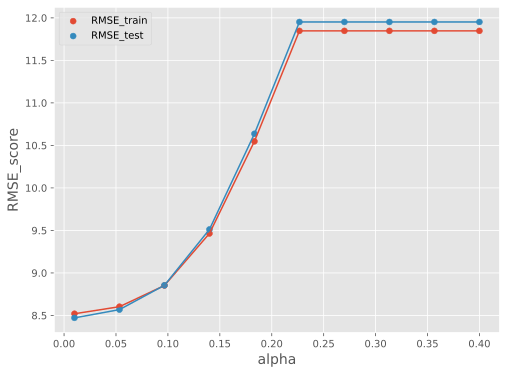

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(alpha,RMSE_train,label='RMSE_train')
plt.plot(alpha,RMSE_train)
plt.scatter(alpha,RMSE_test,label='RMSE_test')
plt.plot(alpha,RMSE_test)
# plt.scatter(alpha,norm,label = 'norm')
# plt.plot(alpha,norm)
# plt.ylim(-0.1,1)
# plt.xlim(0,.43)
plt.xlabel('alpha', size = 14)
plt.ylabel('RMSE_score',size = 14)
plt.legend()
plt.show()

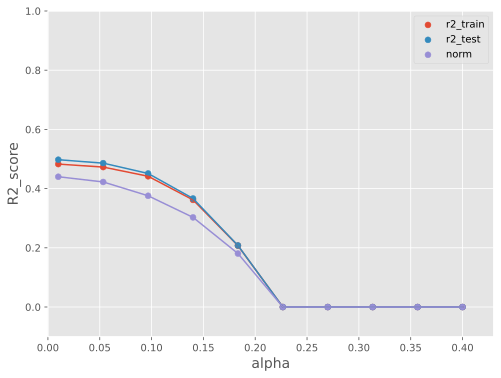

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha', size = 14)
plt.ylabel('R2_score',size = 14)
plt.legend()
plt.show()

In [ ]:
# LGBM REGRESSOR RESULTS
# 
# cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
# RMSE = 10.709416107561104

##hight corr target columns, stats chosen by highest correlation with target

#MV_Traf_2G_d_Mb','MV_Traf_3G_d_Mb','MV_Traf_4G_d_Mb','MV_ARPU','MV_ap_4G_d','MV_ap_innet_out_v','MV_AP_total',
#'non_accum_internet_vol_max_mnt3','gprs_tar_vol_mea_mnt3','data_3g_tar_vol_mea_mnt3','data_3g_tv_cnt_max_mnt1',
# 'content_cnt_mea_mnt3','clc_no_vas_roam_std_mnt3','all_cnt_mea_mnt3','all_clc_mea_mnt3','dpi_duration','dpi_upload',
# 'dpi_download','dpi_events','dpi_day_cnt','target','traff_m5','traff_m3','traff_m2', 'traff_m1']

#RMSE = 10.635576100742853


#withou traffic columns with their STD instead
# RMSE =10.712767746328739

#pca1 and pca2 instead of traffic columns

#RMSE = 10.647630252841243


In [100]:
model = ltb.LGBMRegressor()

parameters = {'n_estimators':[30, 50, 70, 100, 150], 
              'max_depth':[4, 6, 8, 10], 
              'boosting_type': ['gbdt'],
              'objective': ['regression'],
              'is_unbalance': [True], 
              'random_state': [10], 
              'num_leaves': [30],
              'feature_fraction':[0.5],
              'bagging_fraction': [0.8], 
              'bagging_freq':[15],
              'learning_rate':[0.01]}


from sklearn.metrics import make_scorer
score_func = make_scorer(mean_squared_error, squared=False)


grid_search = GridSearchCV(model, parameters, verbose=1, scoring=score_func, n_jobs=-1)
res = grid_search.fit(X_train, y_train)

res



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.8s finished


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.8], 'bagging_freq': [15],
                         'boosting_type': ['gbdt'], 'feature_fraction': [0.5],
                         'is_unbalance': [True], 'learning_rate': [0.01],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [30, 50, 70, 100, 150],
                         'num_leaves': [30], 'objective': ['regression'],
                         'random_state': [10]},
             scoring=make_scorer(mean_squared_error, squared=False), verbose=1)

In [101]:
print(f'Best score: {grid_search.best_score_}', '\n') 
print('Best parameters set:')

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print(f'\t{param_name}:  {best_parameters[param_name]}')

Best score: 10.538565187254786 

Best parameters set:
	bagging_fraction:  0.8
	bagging_freq:  15
	boosting_type:  gbdt
	feature_fraction:  0.5
	is_unbalance:  True
	learning_rate:  0.01
	max_depth:  4
	n_estimators:  30
	num_leaves:  30
	objective:  regression
	random_state:  10


In [102]:
predictions = grid_search.predict(X_test)



In [103]:
mean_squared_error(y_test, predictions, squared=False)

10.624430521676507

In [ ]:
#closs_val_score(model, X, y ... )
#from skearn.model_selection import GridSearchCV